## Imports

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from datetime import datetime as dt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

<Figure size 360x360 with 0 Axes>

## Loading Data

In [102]:
df=pd.read_csv("Data\\Brest_Cancer_Dataset.csv")
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [103]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [104]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

## Processing Data

In [106]:
#Encoding Male and Female to 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [107]:
# Defining X and Y parameters
X = df.iloc[:, :-1].values
Y = df.iloc[:, 30].values

print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (569, 30)
Y: (569,)


In [108]:
#Split Data into training and test (test size 34%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.34, random_state = 0)

print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(Y_train.shape))
print("Y_test: {}".format(Y_test.shape))

X_train: (375, 30)
X_test: (194, 30)
Y_train: (375,)
Y_test: (194,)


## Logistic Regression Classifier

In [111]:
st=dt.now()
LR = LogisticRegression(solver = 'liblinear')
LR.fit(X_train, Y_train)
print("Time taken to complete random search: ", dt.now()-st)

pred_LR = LR.predict(X_test)
#Model Evaluation
LR_acc = accuracy_score(Y_test, pred_LR)
print('Accuracy Score: ' + str(LR_acc))

print('Precision Score: ' + str(precision_score(Y_test, pred_LR)))

print('Recall Score: ' + str(recall_score(Y_test, pred_LR)))

print('F1 Score: ' + str(f1_score(Y_test, pred_LR)))

print('Classification Report: \n' + str(classification_report(Y_test, pred_LR)))

Time taken to complete random search:  0:00:00.007991
Accuracy Score: 0.9639175257731959
Precision Score: 0.9915966386554622
Recall Score: 0.9516129032258065
F1 Score: 0.9711934156378601
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        70
           1       0.99      0.95      0.97       124

   micro avg       0.96      0.96      0.96       194
   macro avg       0.96      0.97      0.96       194
weighted avg       0.97      0.96      0.96       194



## Decision Tree Classifier

In [112]:
st=dt.now()
DTree = DecisionTreeClassifier(criterion = 'entropy', 
                                 random_state = 0)
DTree.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

DTree_pred = DTree.predict(X_test)

#Model Evaluation
DTree_acc = accuracy_score(Y_test, DTree_pred)
print('Accuracy Score: ' + str(DTree_acc))

print('Precision Score: ' + str(precision_score(Y_test, DTree_pred)))

print('Recall Score: ' + str(recall_score(Y_test, DTree_pred)))

print('F1 Score: ' + str(f1_score(Y_test, DTree_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, DTree_pred)))

Time taken to complete random search:  0:00:00.349893
Accuracy Score: 0.9278350515463918
Precision Score: 0.9583333333333334
Recall Score: 0.9274193548387096
F1 Score: 0.9426229508196722
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        70
           1       0.96      0.93      0.94       124

   micro avg       0.93      0.93      0.93       194
   macro avg       0.92      0.93      0.92       194
weighted avg       0.93      0.93      0.93       194



## K Nearest Neighbours Classifier

In [117]:
st=dt.now()
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

knn_pred = knn.predict(X_test)

#Model Evaluation
knn_acc = accuracy_score(Y_test, knn_pred)
print('Accuracy Score: ' + str(knn_acc))

print('Precision Score: ' + str(precision_score(Y_test, knn_pred)))

print('Recall Score: ' + str(recall_score(Y_test, knn_pred)))

print('F1 Score: ' + str(f1_score(Y_test, knn_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, knn_pred)))

Time taken to complete random search:  0:00:00.208378
Accuracy Score: 0.9639175257731959
Precision Score: 0.968
Recall Score: 0.9758064516129032
F1 Score: 0.9718875502008033
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        70
           1       0.97      0.98      0.97       124

   micro avg       0.96      0.96      0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



## Random Forest Classifier

In [118]:
st=dt.now()
RForest = RandomForestClassifier(n_estimators = 100, 
                                      random_state = 0)
RForest.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

RForest_pred = RForest.predict(X_test)

#Model Evaluation
RForest_acc = accuracy_score(Y_test, RForest_pred)
print('Accuracy Score: ' + str(RForest_acc))

print('Precision Score: ' + str(precision_score(Y_test, RForest_pred)))

print('Recall Score: ' + str(recall_score(Y_test, RForest_pred)))

print('F1 Score: ' + str(f1_score(Y_test, RForest_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, RForest_pred)))

Time taken to complete random search:  0:00:00.520590
Accuracy Score: 0.9639175257731959
Precision Score: 0.975609756097561
Recall Score: 0.967741935483871
F1 Score: 0.97165991902834
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        70
           1       0.98      0.97      0.97       124

   micro avg       0.96      0.96      0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



## Analysis of Classifiers

In [119]:
# Comparision of accurcy
print('\n                             Accuracy')
print('                            -------------')

print('Logistic Regression        : {:.04} %'.format(LR_acc * 100))
print('Decision Trees Classifier  : {:.04} %'.format(DTree_acc * 100))
print('KNN Classifier             : {:.04} %'.format(knn_acc * 100))
print('Random Forest Classifier   : {:.04} %'.format(RForest_acc * 100))


                             Accuracy
                            -------------
Logistic Regression        : 96.39 %
Decision Trees Classifier  : 92.78 %
KNN Classifier             : 96.39 %
Random Forest Classifier   : 96.39 %


Text(0.5, 1.0, 'Accuracy comparison')

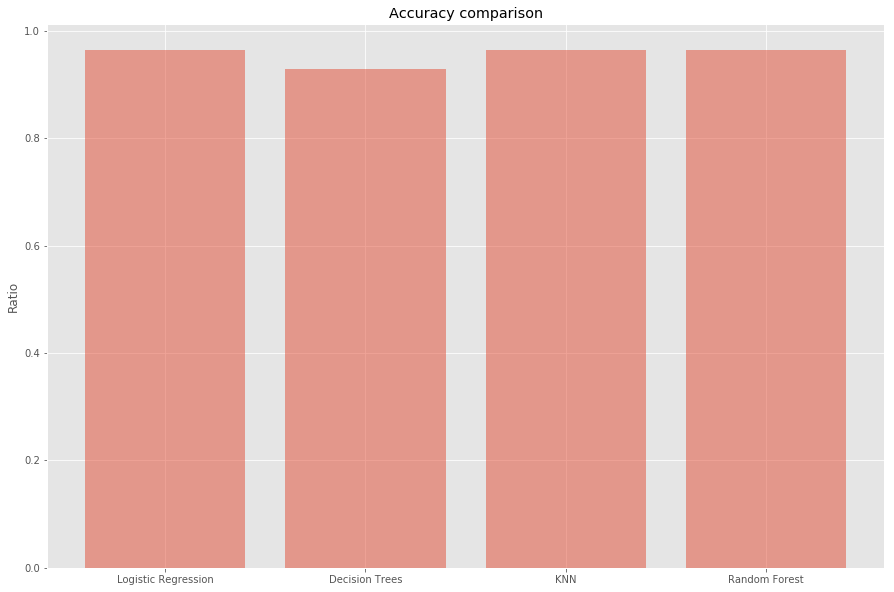

In [120]:
figure = plt.figure(figsize=(15, 10))
# Visualizing the accuracy comparison results
objects = ['Logistic Regression', 'Decision Trees', 'KNN', 'Random Forest']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[LR_acc,DTree_acc,knn_acc,RForest_acc],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Ratio')
plt.title('Accuracy comparison')